# Week 18 Homework

1. What is a neural network? What are the general steps required to build a neural network? 


2. Generally, how do you check the performance of a neural network? Why? 


3. Create a neural network using keras to predict the outcome of either of these datasets: 
Cardiac Arrhythmia: https://archive.ics.uci.edu/ml/datasets/Arrhythmia 
Abalone age: https://archive.ics.uci.edu/ml/datasets/Abalone


4. Write another algorithm to predict the same result as the previous question using either KNN or logistic regression.


5. Create a neural network using pytorch to predict the same result as question 3. 


6. Compare the performance of the neural networks to the other model you created. Which performed better? Why do you think that is?

## 1. What is a neural network? What are the general steps required to build a neural network?

**What is a neural network?**
Neural networks are a machine learning concept roughly built on the idea of processing of data by the human brain,  and in particular, on the transfer of data by neurons. The basic structure of a neural network includes an input layer (the initial data), a number of hidden layers (determined when the network is built and where data is passed along a system of nodes) and an output layer (the final "answer" or results). The hidden layers are comprised of nodes. Each node is connected to a number of nodes in the next deepest layer. When the number of layers exceeds 2, this is considered deep learning. These nodes are the stand ins for neurons and function similarly (to a neuron) at a surface level. Each node essentially performs it's own modeling (often similar to a linear regression). If certain conditions are met in a given node, the node is "activated" and passes along information/data to another node where the process is repeated. If not, the node does nothing. This process continues through the given number of hidden layers with the data being refined and transformed along the way. The final result is the output layer which gives the "answer" to the initial situation set up when the network is initialized. 

**General steps to build a neural network:**
1. Clean and preprocess data
2. Input data and split into training and test sets
3. Select an activation function (may be useful to try a few to optimize the network response)
4. Train the network 
5. Make tweaks to learning rate, weights, etc (can use backward propagation) to tune the model
6. Test your model. If acceptable, move forward and if not, try tuning and adjusting parameters. If still unacceptable (hopefully if you've done enough and high quality preprocessing this won't happen), think and make sure that data was high enough quality and plentiful enough, that the question suits the data, etc.

## 2. Generally, how do you check the performance of a neural network? Why?

The exact metrics chosen to evaluate a neural network will depend on the type of data, research question, field, etc. In general, however, the performance of a neural network will be determined by some type of loss function. The specifics will vary dependant on whether the question at hand is a regression, classification, or ranking problem.

Examples of loss functions that could be used to evaluate neural network performance (not at all exhaustive) could include: 

for regression: mean absolute error (L1), mean squared error (L2),

for classification: negative log likelihood (NLL), cross entropy, or hinge embedding, or Kullback-Liebler divergence (multiclass classification),

for ranking: margin ranking 

or for content based retrieval, triplet margin

Any loss functions works by evaluating the mismatch between known/true values and the predicted model output. Basically, they consider how far off the model is from what we expect as output. In any case, loss should be minimized but the way we do that is highly dependent on the model and research question. Some loss functions respond more to outlier values than others do, some punish large mistakes more than small ones, etc. Know your data and your model and choose an appropriate loss function accordingly. 

# Below is code from week 17 as it is needed to set up the questions for this week. Please scroll down until the heading for week 18 indicates new information.

#### Importing all the normal things

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import pydotplus

from IPython.display import Image

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score

## Chosen Dataset: Abalone Age

https://archive.ics.uci.edu/ml/datasets/Abalone

In [4]:
#loading the data into a dataframe
abalone_df = pd.read_table("abalone.data", sep=",", header = None)
abalone_df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
#renaming the columns

abalone_df.columns = ['sex', 'length', 'diameter', 'height', 'whole_wt', 'shucked_wt', 'viscera_wt', 'shell_wt', 'rings']
abalone_df.head()

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Step 1: Preprocessing

#### Adding a column which converts number of rings to years by adding 1.5 as indicated in the documentation. I do this now since the ultimate desired outcome for this assignment is to predict age.

In [6]:
#Calculating the age using a lambda function
abalone_df['age'] = abalone_df.apply(lambda row : row['rings'] + 1.5, axis = 1)

#viewing the dataframe to confirm column was added correctly and that math looks correct
abalone_df.head()

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


#### Checking for missing values

Documentation indates that from the original dataset, examples with missing values have already been removed. So, we do not need to do this step but in the interest of being thorough, I decided to do a quick check to confirm.


In [7]:
abalone_df.isna().sum()

sex           0
length        0
diameter      0
height        0
whole_wt      0
shucked_wt    0
viscera_wt    0
shell_wt      0
rings         0
age           0
dtype: int64

##### Looking at basic stats for the features

In [8]:
abalone_df.describe()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


Confirms that there are no missing values, so no need to remove anything else.

**Calculate basic stats for M, F, I groups to determine if it may be reasonable to group categories differently**

In [9]:
I_stats = []
F_stats = []
M_stats = []
for entry in abalone_df['sex']:
    if entry == 'I':
        I_rings_stats =  abalone_df['rings'].describe()
    elif entry == 'M':
        M_rings_stats = abalone_df['rings'].describe()
    else:
        F_rings_stats = abalone_df['rings'].describe()
    print(I_rings_stats)
    print(M_rings_stats.describe())
    print(F_rings_stats.describe())

NameError: name 'I_rings_stats' is not defined

#### Creating new dataframes that use different combinations of of 'sex'

###### No sex designation (all values lumped together)

In [10]:
abalone_df_all = abalone_df.drop(['sex'], axis=1)
abalone_df_all.head()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


###### Renaming the sex categories to be "adult" vs "infant" (Note: infant seems misnamed because you wouldn't not have a 20+ year old infant and I'm left wondering if I should have been 'indeterminant' and not 'infant')

In [11]:
abalone_df['age_sex'] = abalone_df.apply(lambda row: 'I' if row['sex'] == 'I' else 'A', axis = 1)
abalone_df.head()

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age,age_sex
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,A
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,A
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,A
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,A
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,I


#### Consider categorical values: One hot encoding

The only categorical data in this dataset is the sex of the abalone. Currently, that information is stored as M for male, F for female, and I for infant. Since there are 3 categories and one should not be ranked higher than another, I'm going to apply one hot encoding instead of any other method. First, I encode all 3 sex determinations.

In [12]:
#Defining a function to one hot encode any categorical features (here, just 'sex') and create a new df

def cat_encode_join (df, feature):
    dummies = pd.get_dummies(df[[feature]])
    encoded_df = pd.concat([df, dummies], axis=1)
    return(encoded_df)

#Calling the new function for the abalone dataframe and the sex column for all 3 'sex' determinants

cat_encoded_3_df = cat_encode_join (abalone_df, 'sex')
cat_encoded_3_df.head()

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age,age_sex,sex_F,sex_I,sex_M
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,A,0,0,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,A,0,0,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,A,1,0,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,A,0,0,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,I,0,1,0


Here, I take the dataframe I created above where sex is labeled by A (adult) or I only and one hot encode that and create another new dataframe to use.

In [13]:
abalone_df_age_s = abalone_df.drop(['sex'], axis = 1)
abalone_df_age_s

cat_encoded_2_df = cat_encode_join(abalone_df_age_s, 'age_sex')
cat_encoded_2_df.head()


,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age,age_sex,age_sex_A,age_sex_I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,A,1,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,A,1,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,A,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,A,1,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,I,0,1


#### Data visualization

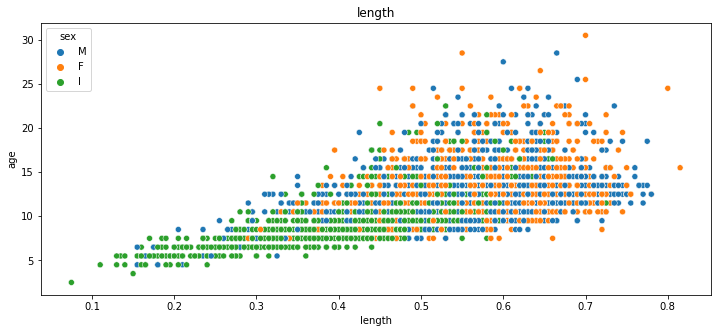

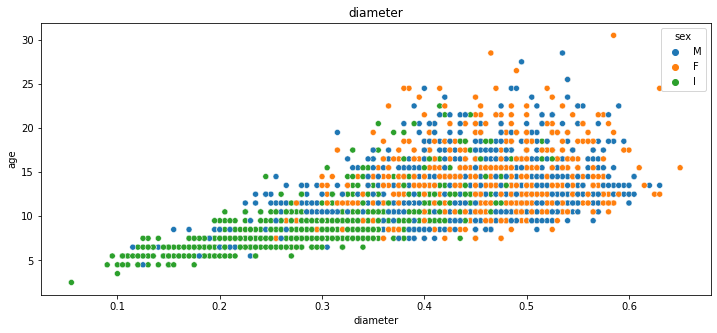

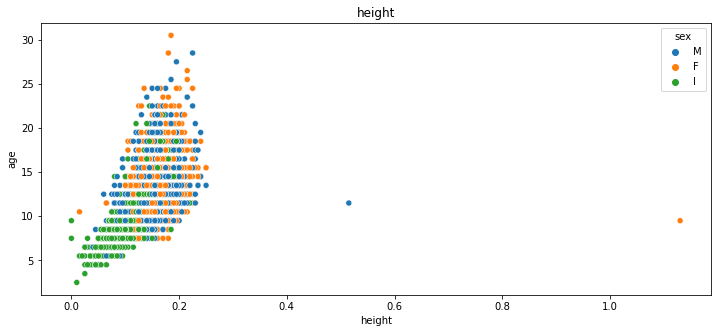

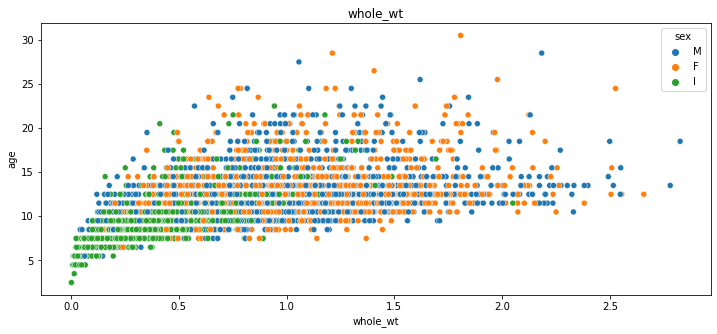

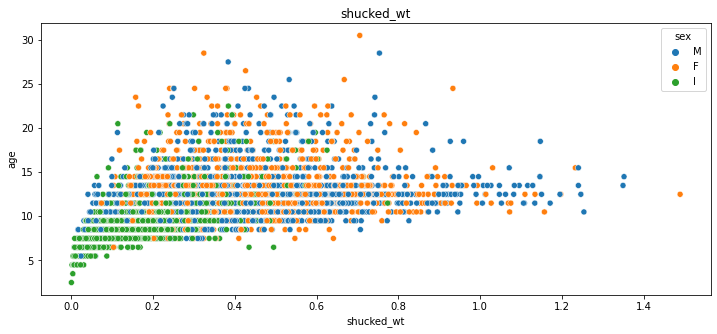

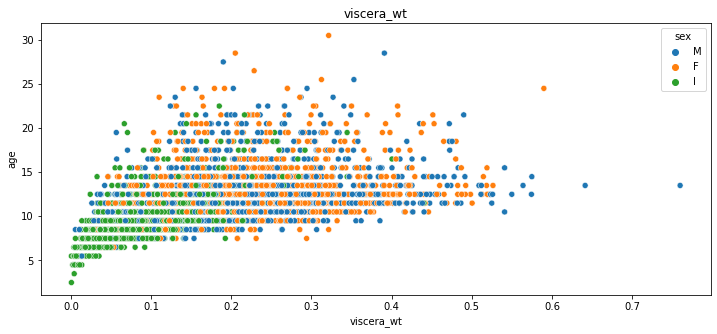

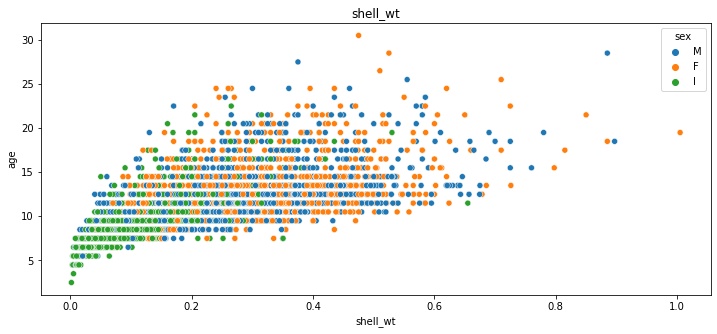

In [14]:
#Defining a function to easily make box plots, scatter plots, and histograms using seaborm to quickly visualize data

def data_vis(df, features, target, plot_type):
    #The function require a dataframe, desired columns, a target column (what will be predicted by models later),
    # and a plot type. The target column is always required even if it isn't used
    for c in features:
        plt.figure(figsize=(12,5))
        plt.title(c)
        if plot_type == 'boxplot':
            sns.boxplot(data=df[c])
        elif plot_type == 'scatterplot':
            sns.scatterplot(data=df, x = df[c], y =  df[target], hue = df['sex'])
        elif plot_type == 'histplot':
            sns.histplot(data=df, x=df[c])
            
            
#Numeric features only are selected for visualizations for now. Since age is variable of interest, I exclude it here.
#Rings column is also excluded as age is derived from those values.

selected_features=[x for x in abalone_df.columns if abalone_df[x].dtype!="object" if x != "age" if x != "rings"]          
selected_features

#Calling the function for the abalone dataframe, the numeric columns, using age as the target and first
#considering scatterplots of each feature against age. Age is on the y-axis here since it will be predicted later.
data_vis(abalone_df, selected_features, 'age', 'scatterplot')


##### Histograms for numeric features

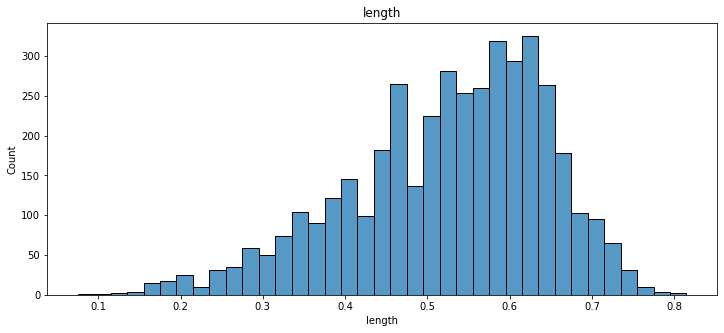

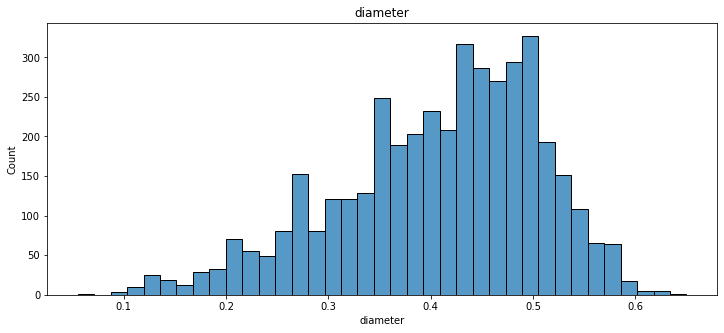

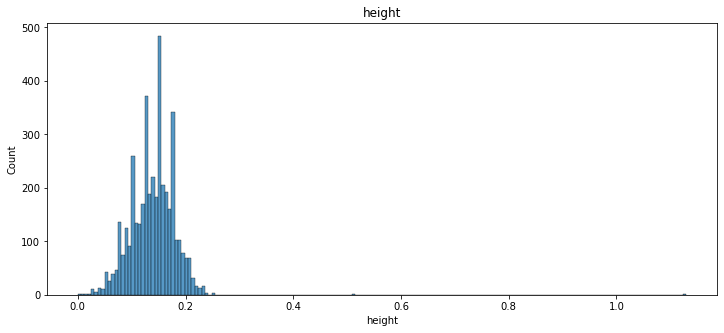

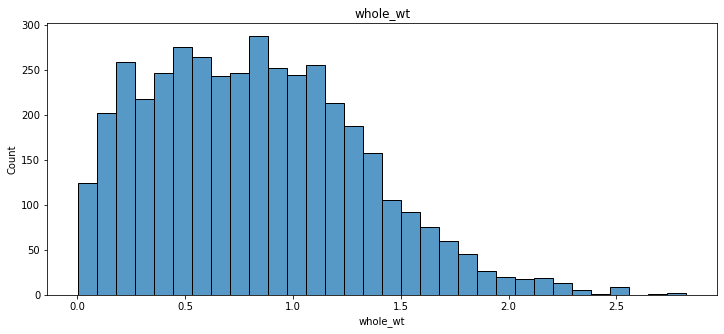

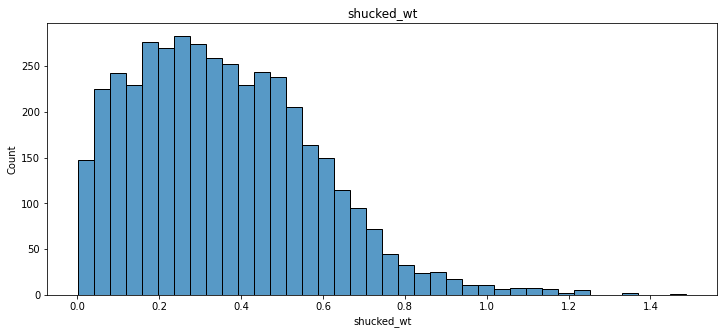

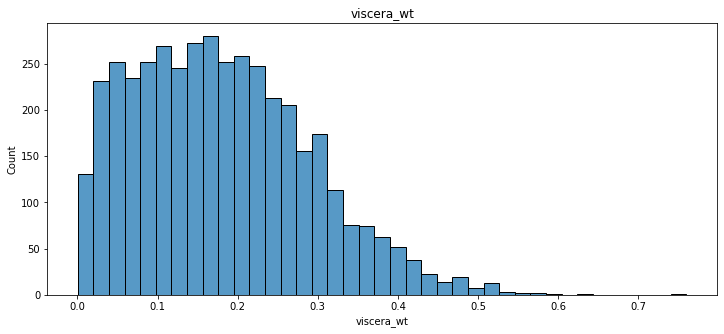

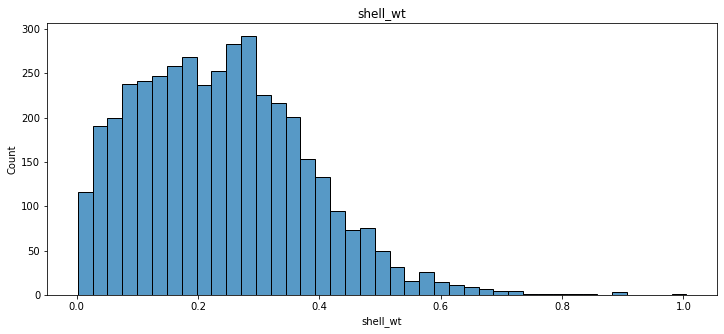

In [15]:
data_vis(abalone_df, selected_features, 'age', 'histplot')

##### Boxplots for numeric features


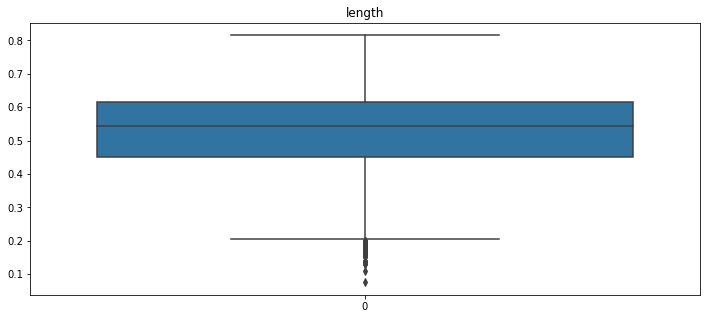

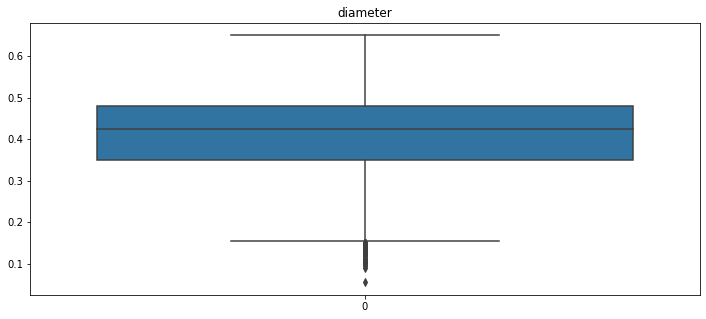

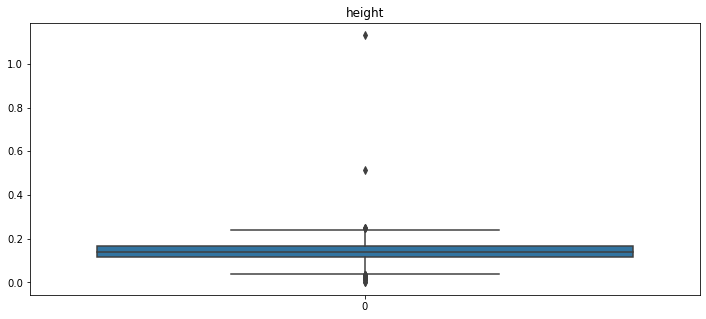

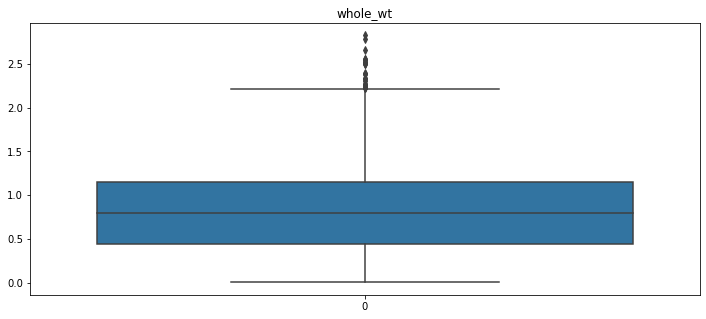

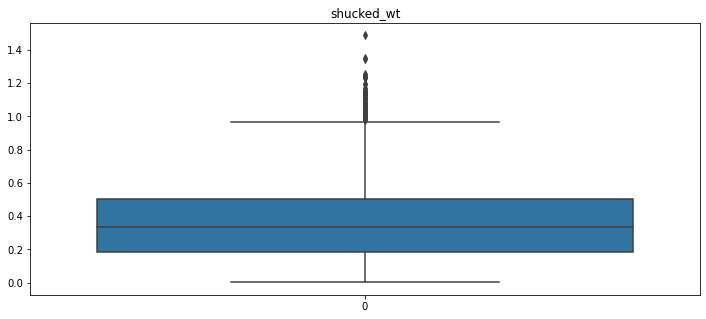

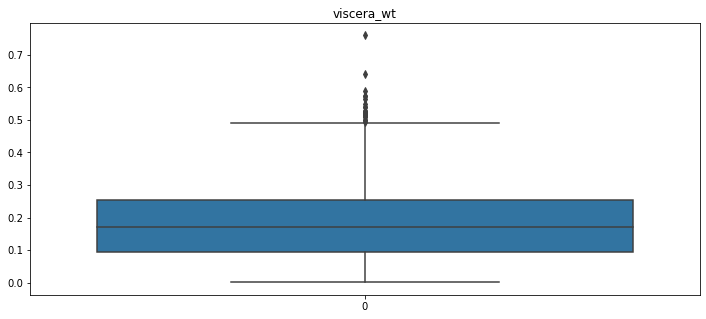

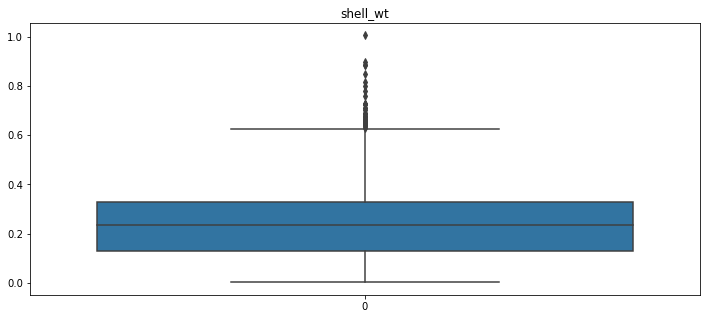

In [16]:
data_vis(abalone_df, selected_features, 'age', 'boxplot')

#### Look for extreme outliers

**Calculating z-score for each feature in the dataset (looking for outliers in single feature space)**

In [17]:
from scipy import stats

def z_score_outliers(df, feature, tol = 2.5):
    #As written, a single feature only should be passed in. tol is defaulted to 2.5 but a reasonable value is
    #anything between 2.5-3.5. The function returns a list of z-scores for a given df, feature, and tol.
    
    outlier_list = []
    index_list = []
   # z_score_list = []
    for c in feature:
        z_score = stats.zscore(df[c])
        #z_score_list.append(z_score)
    #print("z_score is:", z_score)
    for index, entry in enumerate(z_score):
        #print(entry)
        if abs(entry) > abs(tol):
            outlier_list.append(entry)
            index_list.append(index)
    return (outlier_list, index_list)
#print(abalone_df.columns())

#Printing out the indexes for all outliers with a z-score >2.5 for features of interest:
length_outlier, index_length_outlier = z_score_outliers(cat_encoded_2_df, ['length'], 2.5)
#print(length_outlier)
print("length outliers:", index_length_outlier)

ring_outlier, index_ring_outlier = z_score_outliers(cat_encoded_2_df, ['rings'], 2.5)  
#print(ring_outlier)
print("rings outliers:", index_ring_outlier)

wt_outlier, index_wt_outlier = z_score_outliers(cat_encoded_2_df, ['shell_wt'], 2.5)  
#print(ring_outlier)
print("weight outliers:", index_wt_outlier)

diameter_outlier, index_diameter_outlier = z_score_outliers(cat_encoded_2_df, ['diameter'], 2.5)  
#print(ring_outlier)
print("diameter outliers:", index_diameter_outlier)

height_outlier, index_height_outlier = z_score_outliers(cat_encoded_2_df, ['height'], 2.5)  
#print(ring_outlier)
print("height outliers:", index_height_outlier)




length outliers: [43, 44, 148, 149, 236, 237, 238, 239, 305, 306, 321, 463, 465, 520, 523, 525, 526, 547, 611, 694, 696, 718, 719, 720, 784, 892, 1053, 1054, 1055, 1056, 1210, 1429, 1531, 1824, 1986, 1987, 1988, 2114, 2115, 2169, 2171, 2172, 2193, 2343, 2371, 2380, 2381, 2458, 2545, 2626, 2711, 2712, 3141, 3142, 3143, 3190, 3318, 3380, 3472, 3473, 3521, 3600, 3801, 3837, 3899, 3902, 3994]
rings outliers: [6, 9, 32, 33, 72, 83, 128, 129, 163, 166, 167, 181, 232, 236, 256, 270, 275, 277, 278, 293, 294, 310, 312, 313, 314, 318, 351, 355, 357, 360, 362, 365, 372, 375, 416, 417, 426, 427, 428, 429, 430, 431, 432, 433, 442, 449, 469, 478, 480, 483, 497, 501, 530, 572, 582, 592, 593, 613, 621, 628, 642, 658, 660, 664, 672, 673, 674, 675, 678, 734, 744, 754, 756, 811, 2101, 2108, 2151, 2160, 2176, 2180, 2199, 2201, 2202, 2203, 2209, 2210, 2270, 2275, 2277, 2305, 2334, 2335, 2336, 2344, 2351, 2352, 2358, 2362, 2363, 2366, 2416, 2418, 2431, 2436, 2459, 2471, 2476, 2499, 3140, 3149, 3151, 3166, 3

In [18]:
#Combining the outlier index lists into a single list so those rows can be removed from the dataframe
drop_outlier_list = index_length_outlier + index_ring_outlier + index_wt_outlier + index_diameter_outlier + index_height_outlier
#print(drop_outlier_list)

drop_outlier_list_unique = list(set(drop_outlier_list))

drop_outlier_list_unique.sort()
print(drop_outlier_list_unique)

[6, 9, 32, 33, 43, 44, 72, 81, 83, 128, 129, 148, 149, 157, 163, 164, 165, 166, 167, 168, 169, 170, 181, 232, 236, 237, 238, 239, 256, 270, 275, 277, 278, 293, 294, 305, 306, 310, 312, 313, 314, 318, 321, 334, 351, 355, 357, 358, 360, 362, 365, 372, 375, 416, 417, 426, 427, 428, 429, 430, 431, 432, 433, 442, 449, 463, 465, 468, 469, 478, 480, 483, 497, 501, 520, 523, 525, 526, 530, 547, 572, 582, 592, 593, 611, 613, 621, 628, 642, 658, 660, 664, 672, 673, 674, 675, 678, 694, 696, 718, 719, 720, 734, 744, 754, 756, 784, 811, 882, 891, 892, 898, 1051, 1052, 1053, 1054, 1055, 1056, 1174, 1193, 1207, 1208, 1210, 1257, 1417, 1423, 1427, 1428, 1429, 1525, 1531, 1761, 1762, 1763, 1823, 1824, 1985, 1986, 1987, 1988, 2051, 2088, 2090, 2101, 2107, 2108, 2114, 2115, 2151, 2157, 2160, 2161, 2169, 2171, 2172, 2176, 2179, 2180, 2193, 2199, 2201, 2202, 2203, 2208, 2209, 2210, 2265, 2270, 2274, 2275, 2277, 2305, 2334, 2335, 2336, 2343, 2344, 2351, 2352, 2358, 2362, 2363, 2366, 2368, 2371, 2380, 2381, 

In [19]:
#outlier_removed_df = abalone_df.copy(deep=True)
#outlier_removed_df = outlier_removed_df.drop(drop_outlier_list_unique)
#outlier_removed_df


outlier_removed_df = cat_encoded_2_df.copy(deep=True)
outlier_removed_df = outlier_removed_df.drop(drop_outlier_list_unique)
outlier_removed_df

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age,age_sex,age_sex_A,age_sex_I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5,A,1,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5,A,1,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5,A,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5,A,1,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5,I,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5,A,1,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5,A,1,0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5,A,1,0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5,A,1,0


In [20]:
print(outlier_removed_df.head())

   length  diameter  height  whole_wt  shucked_wt  viscera_wt  shell_wt  \
0   0.455     0.365   0.095    0.5140      0.2245      0.1010     0.150   
1   0.350     0.265   0.090    0.2255      0.0995      0.0485     0.070   
2   0.530     0.420   0.135    0.6770      0.2565      0.1415     0.210   
3   0.440     0.365   0.125    0.5160      0.2155      0.1140     0.155   
4   0.330     0.255   0.080    0.2050      0.0895      0.0395     0.055   

   rings   age age_sex  age_sex_A  age_sex_I  
0     15  16.5       A          1          0  
1      7   8.5       A          1          0  
2      9  10.5       A          1          0  
3     10  11.5       A          1          0  
4      7   8.5       I          0          1  


In [21]:
#Calculate IQR of age in years

outlier_removed_df['age'].describe()

IQR = 12.5-9.5
print(IQR)

3.0


#### Heatmap of feature correlation (determination of independence)

              length  diameter    height  whole_wt  shucked_wt  viscera_wt  \
length      1.000000  0.985867  0.892574  0.937983    0.907129    0.911434   
diameter    0.985867  1.000000  0.898440  0.935132    0.899171    0.905170   
height      0.892574  0.898440  1.000000  0.890111    0.838308    0.869493   
whole_wt    0.937983  0.935132  0.890111  1.000000    0.972066    0.967021   
shucked_wt  0.907129  0.899171  0.838308  0.972066    1.000000    0.929063   
viscera_wt  0.911434  0.905170  0.869493  0.967021    0.929063    1.000000   
shell_wt    0.923464  0.929332  0.902963  0.959523    0.896261    0.919919   
rings       0.556871  0.576318  0.600286  0.532251    0.428139    0.513607   
age         0.556871  0.576318  0.600286  0.532251    0.428139    0.513607   
age_sex_A   0.539509  0.553803  0.548647  0.554348    0.515074    0.551769   
age_sex_I  -0.539509 -0.553803 -0.548647 -0.554348   -0.515074   -0.551769   

            shell_wt     rings       age  age_sex_A  age_sex_I 

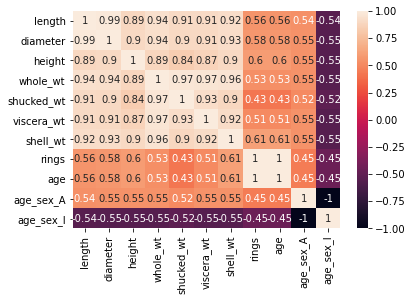

In [22]:
#corr_matrix = abalone_df.corr()
corr_matrix = outlier_removed_df.corr()
print(corr_matrix)

sns.heatmap(corr_matrix, annot = True)


plt.show()

##### Creating pair plots to look at the data in another way (Note: this is the full dataset WITHOUT outliers removed)

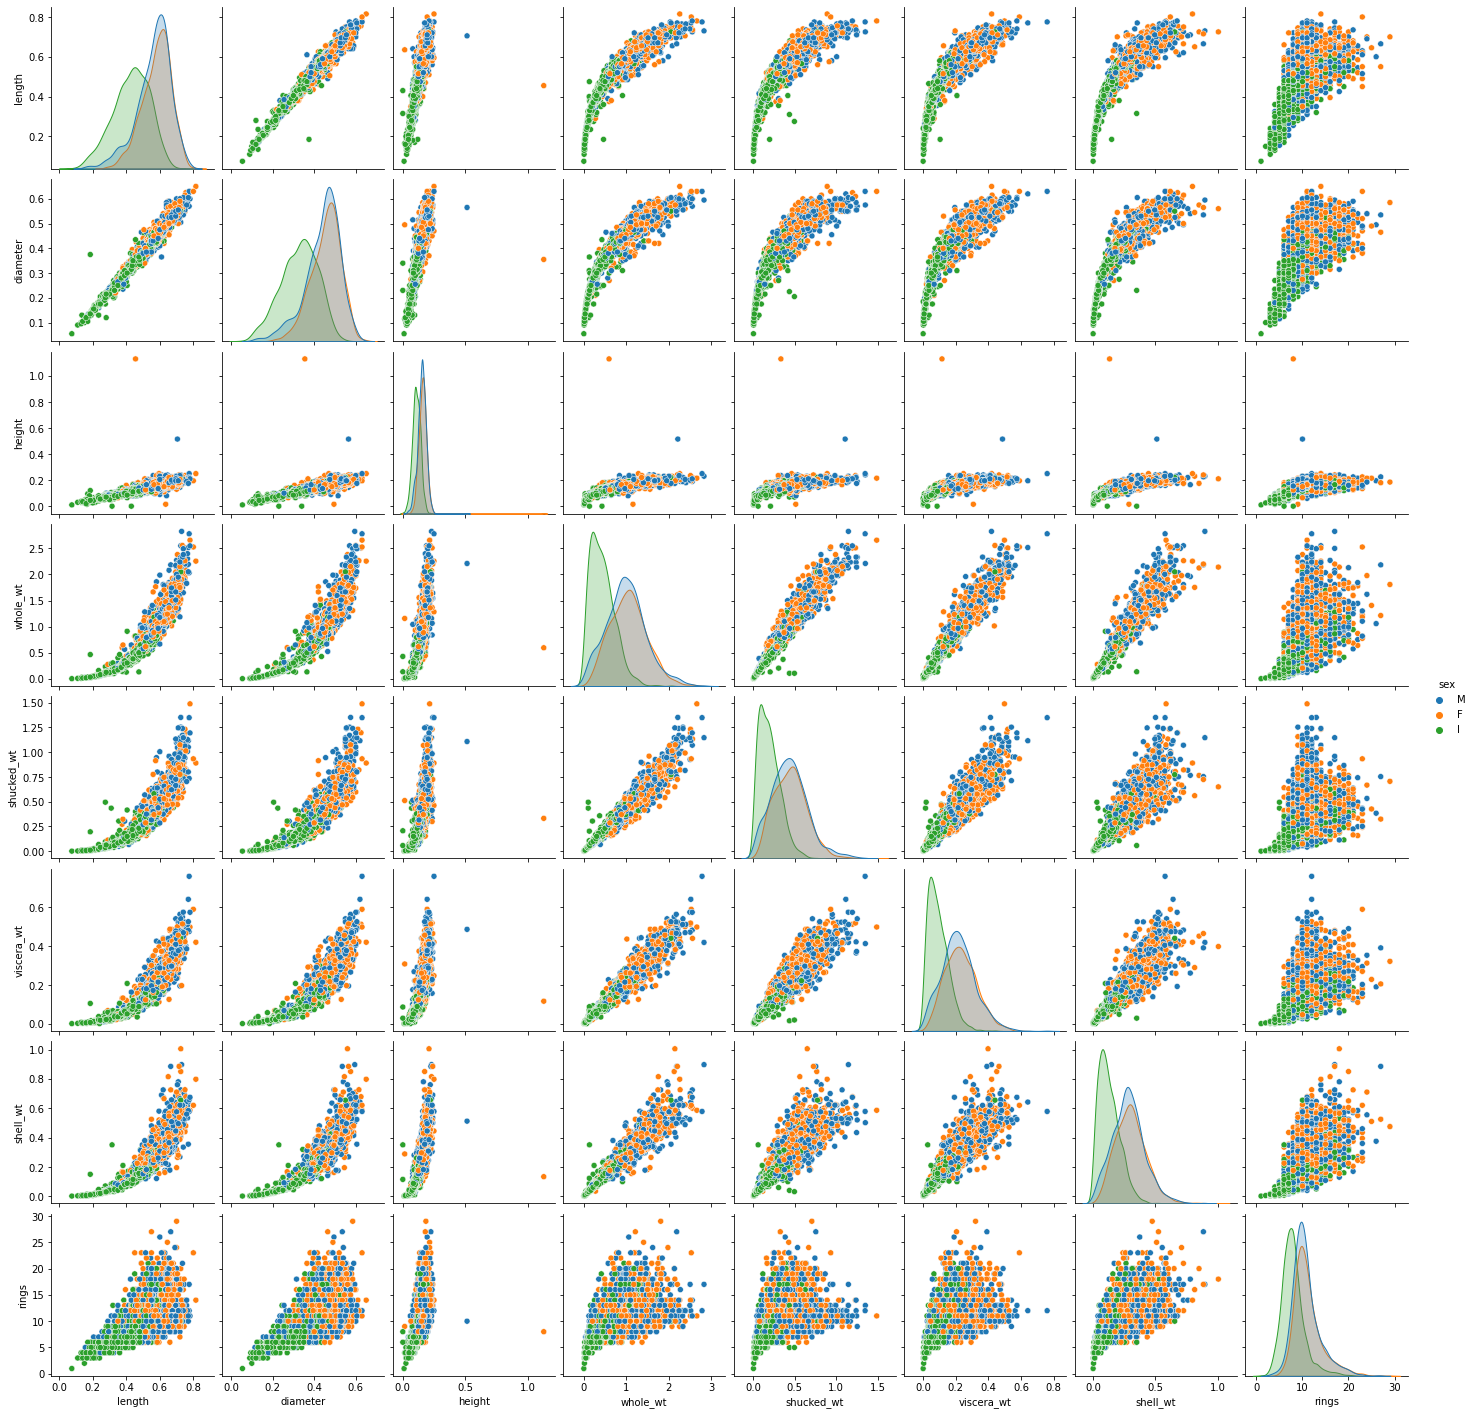

In [23]:
sns.pairplot(abalone_df.drop(['age'], axis=1), hue="sex")

It is clear from the plots above that overall, the I labeled samples have a different sample distribution than the M and F samples (which overlap to a high degree and can probably be taken as a single group).

### Standardize data--look at variance and scales

According to the documentation, ranges of continuous values have already been scaled. This was completed using an "ANN (by dividing by 200)"

PCA???

Resampling if needed?

In [24]:
unique_ages=abalone_df['age'].unique()
sorted(unique_ages)

[2.5,
 3.5,
 4.5,
 5.5,
 6.5,
 7.5,
 8.5,
 9.5,
 10.5,
 11.5,
 12.5,
 13.5,
 14.5,
 15.5,
 16.5,
 17.5,
 18.5,
 19.5,
 20.5,
 21.5,
 22.5,
 23.5,
 24.5,
 25.5,
 26.5,
 27.5,
 28.5,
 30.5]

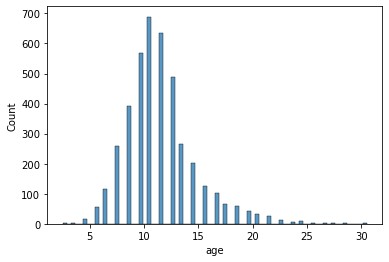

In [25]:
sns.histplot(data=abalone_df, x=abalone_df['age'])
plt.show()

array([[<AxesSubplot:title={'center':'F'}>,
        <AxesSubplot:title={'center':'I'}>],
       [<AxesSubplot:title={'center':'M'}>, <AxesSubplot:>]], dtype=object)

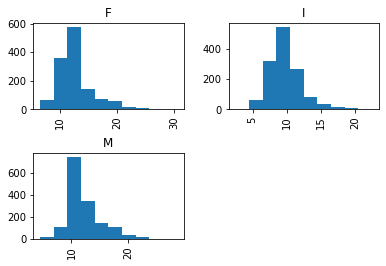

In [26]:
abalone_df['age'].hist(by = abalone_df['sex'])

RFE

## 2) Create a decision tree model tuned to the best of your abilities. Explain how you tuned it.

In [27]:
outlier_removed_df.head()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age,age_sex,age_sex_A,age_sex_I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,A,1,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,A,1,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,A,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,A,1,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,I,0,1


In [28]:
#Trying without any I categorized samples

#no_I_df = outlier_removed_df.drop(outlier_removed_df['age_sex'] == 'I', axis = 1)

#outlier_removed_df.head()
outlier_removed_df.head()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age,age_sex,age_sex_A,age_sex_I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,A,1,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,A,1,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,A,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,A,1,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,I,0,1


In [29]:

X = outlier_removed_df.drop(['age', 'rings', 'age_sex', 'whole_wt', 'shucked_wt', 'viscera_wt', 'diameter'], axis=1)
#print(abalone_df['age'])
y = outlier_removed_df['age']
#print(y)
#print(y.shape)

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


#determining optimized value for max depth
max_accuracy = 0
opt_d = 2
opt_rmse = 0
for n in range(2, 10):
    dt_model = DecisionTreeRegressor(max_depth=n, random_state = 42, min_samples_leaf = 0.1)
    dt_model.fit(X_train, y_train)

    y_pred = dt_model.predict(X_test)
    #Identifying the most performant max depth 
    r2 = dt_model.score(X_test, y_test)
    #print("n:", n, "r^2", r2)
    if r2 > max_accuracy:
        max_accuracy = r2
        opt_d = n
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        opt_rmse = rmse
        r2 = r2_score(y_test, y_pred)
print("optimized_depth is:", opt_d)
print("max_accuracy is:", max_accuracy)
print("rmse is:", opt_rmse)
print("mse is:", mean_squared_error(y_test, y_pred))

print('r2', r2)

#print("R^2: {}".format(dt_model.score(X_test, y_test)))
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#print("Root Mean Squared Error: {}".format(rmse))



#plt.show()

optimized_depth is: 4
max_accuracy is: 0.3743330458472044
rmse is: 2.1088038241294598
mse is: 4.447053568663034
r2 0.3743330458472044


In [30]:

max_r2 = 0
opt_min_leaf = 0.1
opt_rmse = 0
opt_mse = 0

for n in [x/1000.0 for x in range (1, 500)]: 
    print(n)
    dt_model = DecisionTreeRegressor(max_depth=4, random_state = 42, min_samples_leaf = n)
    dt_model.fit(X_train, y_train)

    y_pred = dt_model.predict(X_test)
    #Identifying the most performant max depth 
    #r2 = dt_model.r2_score(y_test, y_test)
    #print("n:", n, "r^2", r2)
    r2 = r2_score(y_test, y_pred)
    if r2 > max_r2:
        max_r2 = r2
        opt_min_leaf = n
        mse = mean_squared_error(y_test, y_pred)
        opt_mse = mse
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        opt_rmse = rmse
        
print("optimized min_samples_leaf is:", opt_min_leaf)
print("max_r2 is:", max_r2)
print("rmse is:", opt_rmse)
print("mse is:", opt_mse)



#reg = DecisionTreeRegressor()
#params = reg.get_params()
#print(params)



0.001
0.002
0.003
0.004
0.005
0.006
0.007
0.008
0.009
0.01
0.011
0.012
0.013
0.014
0.015
0.016
0.017
0.018
0.019
0.02
0.021
0.022
0.023
0.024
0.025
0.026
0.027
0.028
0.029
0.03
0.031
0.032
0.033
0.034
0.035
0.036
0.037
0.038
0.039
0.04
0.041
0.042
0.043
0.044
0.045
0.046
0.047
0.048
0.049
0.05
0.051
0.052
0.053
0.054
0.055
0.056
0.057
0.058
0.059
0.06
0.061
0.062
0.063
0.064
0.065
0.066
0.067
0.068
0.069
0.07
0.071
0.072
0.073
0.074
0.075
0.076
0.077
0.078
0.079
0.08
0.081
0.082
0.083
0.084
0.085
0.086
0.087
0.088
0.089
0.09
0.091
0.092
0.093
0.094
0.095
0.096
0.097
0.098
0.099
0.1
0.101
0.102
0.103
0.104
0.105
0.106
0.107
0.108
0.109
0.11
0.111
0.112
0.113
0.114
0.115
0.116
0.117
0.118
0.119
0.12
0.121
0.122
0.123
0.124
0.125
0.126
0.127
0.128
0.129
0.13
0.131
0.132
0.133
0.134
0.135
0.136
0.137
0.138
0.139
0.14
0.141
0.142
0.143
0.144
0.145
0.146
0.147
0.148
0.149
0.15
0.151
0.152
0.153
0.154
0.155
0.156
0.157
0.158
0.159
0.16
0.161
0.162
0.163
0.164
0.165
0.166
0.167
0.168
0.169
0.1

In [31]:
# Tuning for Min_samples_split
max_r2 = 0
opt_samples_split = 0
opt_rmse = 0
opt_mse = 0

for n in [x/100.0 for x in range (1, 50)]: 
    #print(n)
    dt_model = DecisionTreeRegressor(max_depth=4, random_state = 42, min_samples_leaf = 0.045, min_samples_split=n)
    dt_model.fit(X_train, y_train)

    y_pred = dt_model.predict(X_test)
    #Identifying the most performant max depth 
    #r2 = dt_model.r2_score(y_test, y_test)
    #print("n:", n, "r^2", r2)
    r2 = r2_score(y_test, y_pred)
    if r2 > max_r2:
        max_r2 = r2
        opt_samples_split = n
        mse = mean_squared_error(y_test, y_pred)
        opt_mse = mse
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        opt_rmse = rmse
        
print("optimized min_samples_split is:", opt_samples_split)
print("max_r2 is:", max_r2)
print("rmse is:", opt_rmse)
print("mse is:", opt_mse)

optimized min_samples_split is: 0.01
max_r2 is: 0.42286111225201195
rmse is: 2.025371715944743
mse is: 4.1021305877489525


In [32]:
# Tuning for min_weight_fraction_leaf
max_r2 = 0
opt_min_wt_fr = 0
opt_rmse = 0
opt_mse = 0

for n in [x/1000.0 for x in range (0, 500)]: 
    #print(n)
    dt_model = DecisionTreeRegressor(max_depth=4, random_state = 42, min_samples_leaf = 0.045, 
                                     min_samples_split=0.01, min_weight_fraction_leaf=n)
    dt_model.fit(X_train, y_train)

    y_pred = dt_model.predict(X_test)
    #Identifying the most performant max depth 
    #r2 = dt_model.r2_score(y_test, y_test)
    #print("n:", n, "r^2", r2)
    r2 = r2_score(y_test, y_pred)
    if r2 > max_r2:
        max_r2 = r2
        opt_min_wt_fr = n
        mse = mean_squared_error(y_test, y_pred)
        opt_mse = mse
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        opt_rmse = rmse
        
print("optimized min_weight_fraction_leaf is:", opt_min_wt_fr)
print("max_r2 is:", max_r2)
print("rmse is:", opt_rmse)
print("mse is:", opt_mse)

optimized min_weight_fraction_leaf is: 0.0
max_r2 is: 0.42286111225201195
rmse is: 2.025371715944743
mse is: 4.1021305877489525


In [33]:
#Tried this and it didn't really work; ran out of time to look into more
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
scoring = make_scorer(r2_score)
g_cv = GridSearchCV(DecisionTreeRegressor(random_state=42),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)

g_cv.fit(X_train, y_train)
g_cv.best_params_

result = g_cv.cv_results_
# print(result)
r2_score(y_test, g_cv.best_estimator_.predict(X_test))

0.2136698843633804

## 3) Create a random forest model tuned to the best of your abilities. Explain how you tuned it.

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
rf_model = RandomForestRegressor(random_state=7, n_estimators=200, max_depth=11)
#n_estimators doesn't change much
#max_depth makes a difference-add in for loop to find optimal
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
r2_rf = rf_model.score(X_test, y_test)
print('rf_accuracy is:', r2_rf)
print('rf r2 is:', r2_score(y_test, y_pred_rf))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print('rmse is:', rmse_rf)
#rmse_opt = np.sqrt(mean_squared_error(y_test, y_pred_rf))

rf_accuracy is: 0.45079378123362135
rf r2 is: 0.45079378123362135
rmse is: 1.9757513840279817


In [36]:
reg_rf = RandomForestRegressor()
params_rf = reg_rf.get_params()
print(params_rf)

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


## 4) Create an xgboost model tuned to the best of your abilities. Explain how you tuned it.

In [37]:
import xgboost as xgb

In [38]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

In [39]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
y_pred_2 = preds

In [40]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 1.940444


In [41]:
r2_xg = r2_score(y_test, preds)
print(r2_xg)

0.4702472089226395


In [42]:
xg_reg.score(X_test,y_test)

0.4702472089226395

/Users/jenniferarbuszewski/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

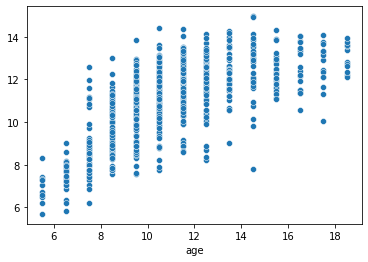

In [43]:
sns.scatterplot(y_test,preds)

## Explanation for tuning and model analysis

I tuned the hyperparameters for my decision tree models by using a for loop for many (but not all) parameters. I chose parameters that appeared to have the largest potential impact on my model. I cycled through allowable values of the parameters and then input that parameter before moving on to the next for loop for a different parameter. For the 2nd 2 models (random forest and xgboost, I manually adjusted the hyperparameters until I found what seemed to be optimal parameters.

Overall, I could never get a great value for r2 or MSE/RMSE. However, it is important to note that the actual rings/age in years of the original data has a large margin of error (about a year). So, in light of that a RMSE of less than 2 actually seems somewhat reasonable. In the end, it all depends on the eventual predictive goals. Sometimes knowing the age within 2 years is perfectly acceptable and other times, it isn't. It all depends on the research question and objectives. I was not comfortable throwing out data without obvious cause and I'm pretty sure at this point that is the only way I could have significantly increased model performance. 

Interestingly, getting rid of outliers didn't seem to lead to significant model performance increases. Nor did paring down features (by including all weights and height, weight, diameter measurements) the r2 and rmse were actually better than limiting to shell weight and just height and length measurments.

Overall, the XGBoost model returned the best results, with the random forest close behind.

### Trying to account for inherent error in age prediction data/ring data

In [44]:
preds_adj = []

for p in y_pred_2:
    preds_temp = p + 0.5
    preds_round = round(preds_temp) - 0.5 
    preds_adj.append(preds_round)
#print(preds_adj)

r2_adj = r2_score(y_test, preds_adj)
print(r2_adj)

mse_adj = mean_squared_error(y_test, preds_adj)
print(mse_adj)

rmse_adj = np.sqrt(mse_adj)
print(rmse_adj)

#And this did NOT help

0.46073868033513166
3.832908163265306
1.9577814390951065


## Trying as a classification problem instead

In [45]:
outlier_removed_df.head()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age,age_sex,age_sex_A,age_sex_I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,A,1,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,A,1,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,A,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,A,1,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,I,0,1


In [46]:
X_c = outlier_removed_df.drop(['rings','whole_wt', 'shucked_wt', 'viscera_wt', 'age', 'age_sex'], axis =1 )

In [47]:
y_c = outlier_removed_df['rings']

In [48]:
  X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size = 0.2, random_state=42)

In [49]:
from sklearn.tree import DecisionTreeClassifier
# Initializing classifier. random_state is to ensure same results in every execution. max_depth is to specify number of splits
dt = DecisionTreeClassifier(random_state=42, max_depth = 3)
# training classifier
dt.fit(X_train_c, y_train_c)
# Evaluate the classifier
print(dt.score(X_test_c, y_test_c))
y_pred_c = dt.predict(X_test_c)
print(y_pred_c.shape)
print(y_test_c.shape)

0.2461734693877551
(784,)
(784,)


In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,\
 classification_report

In [51]:
report = classification_report(y_test_c, y_pred_c)
print(report)
#cm = confusion_matrix(y_test_c, y_pred_c)

              precision    recall  f1-score   support

           4       0.50      0.40      0.44        10
           5       0.00      0.00      0.00        25
           6       0.26      0.26      0.26        58
           7       0.30      0.48      0.37        71
           8       0.32      0.23      0.27       121
           9       0.21      0.31      0.25       137
          10       0.23      0.41      0.29       123
          11       0.22      0.21      0.21        85
          12       0.00      0.00      0.00        48
          13       0.00      0.00      0.00        35
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        19
          16       0.00      0.00      0.00        15
          17       0.00      0.00      0.00        11

    accuracy                           0.25       784
   macro avg       0.14      0.16      0.15       784
weighted avg       0.20      0.25      0.21       784



/Users/jenniferarbuszewski/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jenniferarbuszewski/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jenniferarbuszewski/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [71]:
bins_8 = outlier_removed_df.copy(deep=True)

bin_8_age = []
for a in bins_8['age']:
    if a < 6:
        bin_8_age.append(1)
    elif a <= 9:
        bin_8_age.append(2)
    elif a <= 12:
        bin_8_age.append(3)
    elif a <= 15:
        bin_8_age.append(4)
    elif a <= 18:
        bin_8_age.append(5)
    elif a <= 21:
        bin_8_age.append(6)
    elif a <= 24:
        bin_8_age.append(7)
    else:
        bin_8_age.append(8)
        
print(bin_8_age)


bins_8['bin_age_8'] = bin_8_age
bins_8.head()

[5, 2, 3, 3, 2, 3, 5, 3, 5, 3, 4, 3, 3, 4, 2, 3, 2, 3, 4, 3, 4, 3, 3, 4, 4, 4, 5, 4, 3, 5, 4, 3, 5, 3, 4, 3, 3, 5, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 1, 2, 2, 3, 3, 2, 3, 3, 4, 4, 3, 2, 4, 3, 4, 4, 5, 3, 3, 4, 5, 3, 5, 5, 4, 4, 3, 3, 4, 5, 4, 4, 3, 5, 5, 3, 3, 2, 3, 2, 5, 5, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 2, 5, 2, 2, 2, 2, 3, 6, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 5, 4, 3, 3, 3, 3, 5, 3, 3, 3, 4, 3, 4, 4, 4, 4, 4, 4, 2, 3, 3, 2, 2, 2, 3, 1, 4, 5, 3, 3, 4, 4, 4, 3, 4, 3, 4, 4, 5, 3, 3, 4, 4, 5, 5, 3, 3, 4, 4, 4, 3, 3, 3, 3, 4, 2, 3, 2, 4, 3, 5, 3, 3, 2, 3, 3, 3, 4, 3, 4, 3, 3, 2, 2, 4, 5, 4, 5, 2, 4, 3, 6, 2, 2, 3, 3, 3, 4, 3, 2, 2, 2, 4, 4, 5, 5, 5, 3, 5, 4, 4, 4, 4, 1, 2, 4, 5, 3, 3, 4, 5, 5, 5, 4, 4, 4, 5, 2, 3, 5, 5, 3, 3, 6, 3, 3, 6, 4, 5, 2, 2, 1, 4, 3, 3, 4, 3, 2, 3, 4, 5, 3, 5, 3, 5, 3, 2, 2, 4, 2, 2, 2, 2, 4, 3, 3, 4, 3, 2, 2, 4, 5, 5, 4, 5, 5, 5, 4, 4, 3, 4, 3, 2, 3, 5, 3, 4, 3, 5, 4, 5, 4, 5, 4, 4, 3, 4, 6, 5, 5, 5, 4, 4, 3, 5, 4, 5, 3, 3, 4, 3, 3, 

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age,age_sex,age_sex_A,age_sex_I,bin_age_8
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,A,1,0,5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,A,1,0,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,A,1,0,3
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,A,1,0,3
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,I,0,1,2


In [76]:
#Setting new X and y values and splitting the dataset--dropping all but shell weight column and dropping diameter
X = bins_8.drop(['rings', 'age', 'age_sex', 'bin_age_8', 'diameter', 'whole_wt',
                    'shucked_wt', 'viscera_wt'], axis =1 )
y = bins_8['bin_age_8']
X_train, X_test, y_train, y_test = train_test_split(X, 
                            y, test_size = 0.2, random_state=42, stratify = y)

# #Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# Week 18 New Work picks up here!

### Neural network development using keras

In [111]:
X_tf = bins_8.drop(['rings', 'age', 'age_sex', 'bin_age_8', 'diameter', 'whole_wt',
                    'shucked_wt', 'viscera_wt'], axis =1 )
X_tf = X_tf.values


y_tf = bins_8['bin_age_8']
y_tf = y_tf.values

X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf, 
                            y_tf, test_size = 0.2, random_state=42, stratify = y_tf)

# #Standardize
sc= StandardScaler()
X_train_tf=sc.fit_transform(X_train_tf)
X_test_tf=sc.fit_transform(X_test_tf)

In [112]:

# check version
import tensorflow
print(tensorflow.__version__)

2.4.1


In [113]:
#importing sequential class for tensor flow (supposed to be simple; linearly links model input--outputs)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define the model
model = Sequential()
model.add(Dense(20, input_shape=(5,)))
model.add(Dense(1))
model.add(Dense(1))

In [119]:

# mlp for multiclass classification
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


number_features = X_train_tf.shape[1]
print(number_features)

# using a sequential model as a first attempt. Sequential models are simple--connecting input -- output linearly
#Here, keeping the same activation function as I am using in the pytorch model-ReLu. I tried to keep as many
#parameters as possible constant to allow for fair comparisons.
model = Sequential()
model.add(Dense(20, activation='relu', kernel_initializer='he_normal', input_shape=(number_features,)))
model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(8, activation='softmax'))

# I am using the Adam optimizer for both neural networks this week and keeping the loss funtions as cross entropy loss.
#I evaluate both neural networks using accuracy scores
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# I fit the model to my training data and keep epochs set to 500 for both neural networks
model.fit(X_train_tf, y_train_tf, epochs=500, batch_size=32, verbose=0)

# I evaluated my classification neural networks using accuracy scores, which is printed here
loss, accuracy = model.evaluate(X_test_tf, y_test_tf, verbose=0)
print('Test Accuracy: ', accuracy)

#I predicted the y values using the model and X test values
y_pred_tf = model.predict(X_test_tf)
#print('Predicted: %s (class=%d)' % (y_pred_tf, argmax(y_pred_tf)))

5
Test Accuracy:  0.6045918464660645


### Logistic regression

/Users/jenniferarbuszewski/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jenniferarbuszewski/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jenniferarbuszewski/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: Undefined

0.4807348813472825
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.64      0.67      0.66       148
           3       0.57      0.77      0.66       377
           4       0.46      0.28      0.35       187
           5       0.14      0.02      0.03        56
           6       0.00      0.00      0.00        10

    accuracy                           0.57       784
   macro avg       0.30      0.29      0.28       784
weighted avg       0.52      0.57      0.52       784



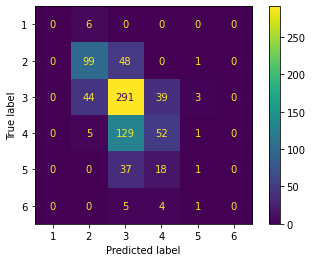

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_l = bins_8.drop(['rings', 'age', 'age_sex', 'bin_age_8', 'diameter', 'whole_wt',
                    'shucked_wt', 'viscera_wt'], axis =1 )



y_l = bins_8['bin_age_8']


X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_l, 
                            y_l, test_size = 0.2, random_state=42, stratify = y_l)

# #Standardize
sc= StandardScaler()
X_train_l=sc.fit_transform(X_train_l)
X_test_tf=sc.fit_transform(X_test_l)

# Split into training and test set
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_l, y_l, test_size = 0.2, random_state=42, stratify=y_l)

#Standardize
sc= StandardScaler()
X_train_l=sc.fit_transform(X_train_l)
X_test_l=sc.fit_transform(X_test_l)

#Simplest logistic regression approach
clf = LogisticRegression(random_state=42).fit(X_train_l, y_train_l)
#sample_pred=[[6,148,72,35,0,33.6,0.627,50]]
y_pred_l = clf.predict(X_test_l)

print(clf.score(X_l,y_l))

import seaborn as sns
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

print(classification_report(y_test_l, y_pred_l))

conf_matrix = confusion_matrix(y_test_l, y_pred_l)

plot_confusion_matrix(clf, X_test_l, y_test_l)  
plt.show() 

### KNN 

### Neural network development using Pytorch 

In [77]:
import torch

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Split into training and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# #Standardize
#sc= StandardScaler()
#X_train=sc.fit_transform(X_train)
#X_test=sc.fit_transform(X_test)

In [85]:
import torch.nn as nn
import torch.nn.functional as F #this has activation functions

# Creating tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)


#print(y_train)
y_train_t = torch.LongTensor(y_train)
#print(y_test)
y_test_t = torch.LongTensor(y_test.values)

#print(X_train)

In [100]:
class ANN_Model(nn.Module):
    def __init__(self, input_features=5, hidden1=20, hidden2=20, out_features =8):
        super().__init__()
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
    
    def forward(self, x):
        #apply activation functions
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [101]:
torch.manual_seed(42)

#instantiate the model
model = ANN_Model()

In [102]:
# loss function
loss_function = nn.CrossEntropyLoss()

#optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

#optimizer #2: SGD:
#optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

#optimizer #3: SGD without momentum specified:
#optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [104]:
#run model through multiple epochs/iterations
final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    #print(epoch)
    #print(X_train.shape)
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)
    
    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss: {loss.item()}')
    
    optimizer.zero_grad() #zero the gradient before running backwards propagation
    loss.backward() #for backward propagation 
    optimizer.step() #performs one optimization step each epoch

Epoch number: 1 with loss: 1.1741472482681274
Epoch number: 11 with loss: 1.1702024936676025
Epoch number: 21 with loss: 1.1664392948150635
Epoch number: 31 with loss: 1.162843108177185
Epoch number: 41 with loss: 1.1594048738479614
Epoch number: 51 with loss: 1.1561082601547241
Epoch number: 61 with loss: 1.1529370546340942
Epoch number: 71 with loss: 1.1498936414718628
Epoch number: 81 with loss: 1.1469711065292358
Epoch number: 91 with loss: 1.144154667854309
Epoch number: 101 with loss: 1.1414402723312378
Epoch number: 111 with loss: 1.138821005821228
Epoch number: 121 with loss: 1.13629150390625
Epoch number: 131 with loss: 1.1338446140289307
Epoch number: 141 with loss: 1.1314805746078491
Epoch number: 151 with loss: 1.1291927099227905
Epoch number: 161 with loss: 1.1269811391830444
Epoch number: 171 with loss: 1.1248350143432617
Epoch number: 181 with loss: 1.1227532625198364
Epoch number: 191 with loss: 1.1207355260849
Epoch number: 201 with loss: 1.1187762022018433
Epoch numbe

In [105]:
#predictions
y_pred = []

with torch.no_grad():
    for i, data in enumerate(X_test):
        prediction = model(data)
        y_pred.append(prediction.argmax().item())



In [106]:
from sklearn.metrics import accuracy_score
a_score = accuracy_score(y_test, y_pred)
print(a_score)

0.5956632653061225


In [107]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.70      0.67      0.68       148
           3       0.57      0.87      0.69       377
           4       0.62      0.21      0.32       187
           5       0.00      0.00      0.00        56
           6       0.00      0.00      0.00        10

    accuracy                           0.60       784
   macro avg       0.31      0.29      0.28       784
weighted avg       0.55      0.60      0.54       784



/Users/jenniferarbuszewski/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jenniferarbuszewski/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jenniferarbuszewski/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

### Model Comparison

I chose to run both the keras tensor flow and pytorch neural networks using the same optimization and keeping as many parameters constant between the two as possible. Both models were similarly performant (accuracy scores of about 0.59) when running as a classification type problem (using binned ages with 8 bins). The logistic regression was less performant with an accuracy score of about 0.5. Compared to last week's classification models, the neural network offered some increased performance (around 0.49 for decision tree accuracy score for example). However, given the significant increase in model complexity, it seems like it is not really worth a very modest increase in accuracy score.

Binning the data and running as a classification problem did not yield significantly better results in my opinion. However, I wanted to be able to run the logistic regression this week (a classification problem) so I started off looking at just the classification. If time permits, I plan to rerun everything written for regression problems. That will also allow me to compare to a broader range of results from last week.